<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
C:\Users\DCL\AppData\Local\Temp\ipykernel_19444\3985543856.py:8: SyntaxWarning: invalid escape sequence '\p'
  model = tf.keras.models.load_model("E:\python\ML\pothole_detection_CNN\Model\Trained Modelv2\CNN.h5")
C:\Users\DCL\AppData\Local\Temp\ipykernel_19444\3985543856.py:9: SyntaxWarning: invalid escape sequence '\p'
  img = cv2.imread("E:\python\ML\pothole_detection_CNN\Test random data\\c4.jpeg")


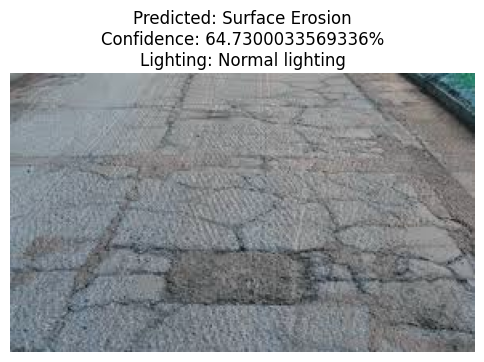

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
import cv2
IMAGE_SIZE = 224
CLASS_NAMES = ['Crack', 'Pothole', 'Surface Erosion']
model = tf.keras.models.load_model("E:\python\ML\pothole_detection_CNN\Model\Trained Modelv2\CNN.h5")
img = cv2.imread("E:\python\ML\pothole_detection_CNN\Test random data\\c4.jpeg")
img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE)) 
img_array = img_resized / 255.0 
img_array = np.expand_dims(img_array, axis=0)

def predict(model, img):
    # Expand image dims and predict
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array_expanded = tf.expand_dims(img_array, 0)
    prediction = model.predict(img_array_expanded, verbose=0)

    predicted_class = CLASS_NAMES[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])), 2)

    # Lighting detection
    grayscale_img = tf.image.rgb_to_grayscale(img_array)
    brightness = tf.reduce_mean(grayscale_img).numpy()

    if brightness < 100:
        lighting = "Low light"
    elif brightness > 180:
        lighting = "High light"
    else:
        lighting = "Normal lighting"
    return predicted_class, confidence, lighting
predicted_class, confidence, lighting = predict(model, img)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence}%\nLighting: {lighting}")
plt.axis("off")
plt.show()